# Notebook for preparing and saving GraphTheoryProp graphs

In [1]:
import numpy as np
import torch
import pickle
import time
import os
%matplotlib inline
import matplotlib.pyplot as plt


# Download GraphTheoryProp dataset
Actual source https://github.com/lukecavabarrett/pna

In [8]:
if not os.path.isfile('multitask_dataset.pkl'):
    print('downloading..')
    !curl https://www.dropbox.com/s/zdevjruk7k6yuqc/multitask_dataset.pkl?dl=1 -o multitask_dataset.pkl -J -L -k
else:
    print('File already downloaded')
    

File already downloaded


# Convert to DGL format and save with pickle

In [ ]:
import os
os.chdir('../../') # go to root folder of the project
print(os.getcwd())


In [10]:
import pickle

%load_ext autoreload
%autoreload 2

from data.graphtheoryprop import GraphTheoryPropDatasetDGL 

from data.data import LoadData
from torch.utils.data import DataLoader
from data.graphtheoryprop import GraphTheoryPropDataset


In [14]:
DATASET_NAME = 'GraphTheoryProp'
dataset = GraphTheoryPropDatasetDGL(DATASET_NAME) 

preparing graphs for the TRAIN set...
preparing graphs for the VAL set...
preparing graphs for the TEST set...
Time taken: 4.2379s


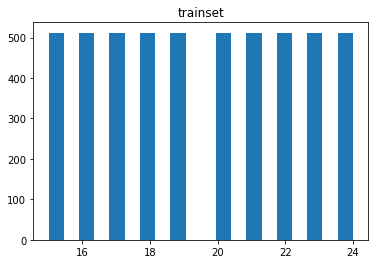

min/max : 15 24


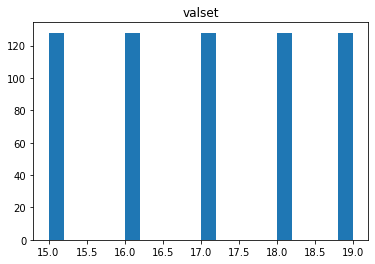

min/max : 15 19


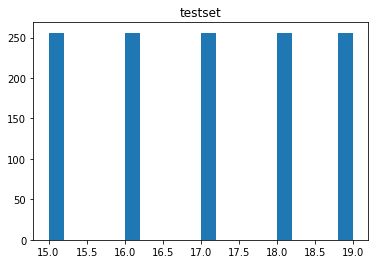

min/max : 15 19


In [15]:
def plot_histo_graphs(dataset, title):
    # histogram of graph sizes
    graph_sizes = []
    for graph in dataset:
        graph_sizes.append(graph[0].number_of_nodes())
    plt.figure(1)
    plt.hist(graph_sizes, bins=20)
    plt.title(title)
    plt.show()
    graph_sizes = torch.Tensor(graph_sizes)
    print('min/max :',graph_sizes.min().long().item(),graph_sizes.max().long().item())
    
plot_histo_graphs(dataset.train,'trainset')
plot_histo_graphs(dataset.val,'valset')
plot_histo_graphs(dataset.test,'testset')


In [16]:
print(len(dataset.train))
print(len(dataset.val))
print(len(dataset.test))

print(dataset.train[0])
print(dataset.val[0])
print(dataset.test[0])


5120
640
1280
(Graph(num_nodes=15, num_edges=26,
      ndata_schemes={'feat': Scheme(shape=(2,), dtype=torch.float32)}
      edata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}), tensor([0.0000, 0.1739, 0.1260]), tensor([[ 8.6957e-02,  1.7391e-01,  3.9386e-03],
        [ 8.6957e-02,  8.6957e-02,  1.2333e-02],
        [ 1.3043e-01,  1.3043e-01,  5.0524e-03],
        [ 1.7391e-01,  1.7391e-01, -2.8644e-03],
        [ 0.0000e+00,  8.6957e-02,  2.7865e-02],
        [ 0.0000e+00,  8.6957e-02,  1.5610e-02],
        [ 8.6957e-02,  1.7391e-01,  1.6334e-04],
        [ 4.3478e-02,  1.3043e-01, -1.3372e-01],
        [ 8.6957e-02,  1.7391e-01, -3.5295e-04],
        [ 0.0000e+00,  4.3478e-02, -1.9937e-02],
        [ 8.6957e-02,  1.7391e-01,  3.3696e-02],
        [ 8.6957e-02,  1.7391e-01,  1.6398e-02],
        [ 0.0000e+00,  8.6957e-02, -2.3538e-02],
        [ 0.0000e+00,  1.7391e-01,  4.5834e-02],
        [ 8.6957e-02,  1.7391e-01,  1.9520e-02]]))
(Graph(num_nodes=15, num_edges=116,
      

In [17]:
start = time.time()
with open('data/graphtheoryprop/GraphTheoryProp'+'.pkl','wb') as f:
        pickle.dump([dataset.train,dataset.val,dataset.test],f)
print('Time (sec):',time.time() - start)


Time (sec): 7.805322885513306


# Test load function

In [20]:
DATASET_NAME = 'GraphTheoryProp'
dataset = LoadData(DATASET_NAME)
trainset, valset, testset = dataset.train, dataset.val, dataset.test


[I] Loading dataset GraphTheoryProp...
train, test, val sizes : 5120 1280 640
[I] Finished loading.
[I] Data load time: 6.1830s


In [21]:
batch_size = 10
collate = GraphTheoryPropDataset.collate
print(GraphTheoryPropDataset)
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, collate_fn=collate)


<class 'data.graphtheoryprop.GraphTheoryPropDataset'>
